# Clean and Analyze Employee Exit Surveys


## Introduction

In [1]:
import pandas as pd
import numpy as np

In [4]:
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [11]:
pd.options.display.max_columns = 999

dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [9]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [10]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [13]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [14]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

We'll need to handle missing values and remove unneccessary fields in both datasets.

In [16]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated') #read 'Not Stated' as NaN

In [18]:
#remove unnecessary columns in both datasets.
dete_survey_updated = dete_survey.drop(date_survey.columns[28:49], axis=1)
tafe_survey_update = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [20]:
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [21]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(" ", "_")
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [22]:
map = {'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

tafe_survey_updated = tafe_survey.rename(map, axis=1)

tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate opportunities for personal developmen

In [23]:
dete_survey_updated.separationtype.value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [24]:
tafe_survey_updated.separationtype.value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [37]:
#update elements that contains 'Resignation' to 'Resignation' only.
dete_survey_updated.separationtype = dete_survey_updated.separationtype.str.split("-").str[0]
#use .copy() to avoid SettingWithCopy Warning error.
dete_resignations = dete_survey_updated.loc[dete_survey_updated.loc[:,'separationtype'] == "Resignation"].copy()
dete_resignations.separationtype.value_counts()

Resignation    311
Name: separationtype, dtype: int64

In [36]:
tafe_resignations = tafe_survey_updated.loc[tafe_survey_updated.loc[:,'separationtype'] == "Resignation"].copy()
tafe_resignations.separationtype.value_counts()

Resignation    340
Name: separationtype, dtype: int64

In [32]:
dete_resignations.cease_date.value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
09/2010      1
2010         1
07/2006      1
07/2012      1
Name: cease_date, dtype: int64

In [39]:
dete_resignations.cease_date = dete_resignations.cease_date.str.split("/").str[-1].astype(float)
dete_resignations.cease_date.value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [40]:
tafe_resignations.cease_date.value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

In [42]:
dete_resignations.dete_start_date.value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [59]:
dete_resignations.dete_start_date.head()

3     2005.0
5     1994.0
8     2009.0
9     1997.0
11    2009.0
Name: dete_start_date, dtype: float64

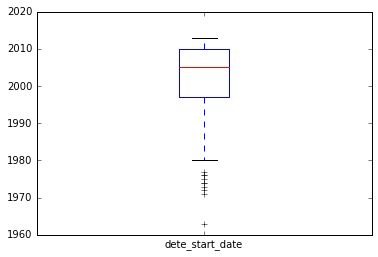

In [63]:
dete_resignations['dete_start_date'].plot.box()

In [68]:
dete_resignations['institute_service'] = dete_resignations.cease_date - dete_resignations.dete_start_date

dete_resignations['institute_service'].value_counts().sort_values(ascending=False)

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
8.0      8
13.0     8
20.0     7
15.0     7
10.0     6
22.0     6
14.0     6
17.0     6
12.0     6
18.0     5
16.0     5
23.0     4
24.0     4
11.0     4
39.0     3
19.0     3
21.0     3
32.0     3
30.0     2
28.0     2
26.0     2
25.0     2
36.0     2
41.0     1
34.0     1
38.0     1
35.0     1
49.0     1
27.0     1
42.0     1
33.0     1
29.0     1
31.0     1
Name: institute_service, dtype: int64

In [69]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [70]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [77]:
def update_vals(element):
    if element == '-':
        return False
    elif pd.isnull(element):
        return np.nan
    else:
        return True
    
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [135]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
'dissatisfaction_with_the_department',
'physical_work_environment',
'lack_of_recognition',
'lack_of_job_security',
'work_location',
'employment_conditions',
'work_life_balance',
'workload']].any(1, skipna=False)

dete_resignations_up = dete_resignations.copy()
dete_resignations['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [136]:
dete_resignations_up['institute'] = "DETE"
tafe_resignations_up['institute'] = "TAFE"

In [137]:
combined = pd.concat([dete_resignations_up,tafe_resignations_up], ignore_index=True)

In [138]:
combined.notnull().sum().sort_values()

torres_strait                                                                                                                                                      0
south_sea                                                                                                                                                          3
aboriginal                                                                                                                                                         7
disability                                                                                                                                                         8
nesb                                                                                                                                                               9
business_unit                                                                                                                                                     32
Main Facto

In [151]:
combined_updated = combined.dropna(thresh=500, axis=1).copy()

combined_updated.notnull().sum().sort_values()

institute_service    563
gender               592
age                  596
employment_status    597
position             598
cease_date           635
dissatisfied         643
id                   651
institute            651
separationtype       651
dtype: int64

In [152]:
combined_updated.institute_service.value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
22.0                   6
17.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
21.0                   3
39.0                   3
30.0                   2
25.0                   2
26.0                   2
28.0                   2
36.0                   2


In [153]:
combined_updated['institute_service_up'] = combined_updated.institute_service.astype(str).str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype(float)
combined_updated['institute_service_up'].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [154]:
def update_val(element):
    if pd.isnull(element):
        return np.nan
    elif element < 3:
        return "New"
    elif 3 <= element <= 6:
        return "Experienced"
    elif 7 <= element <= 10:
        return "Established"
    else:
        return "Veteran"

combined_updated['service_cat'] = combined_updated.institute_service_up.apply(update_val)
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

In [155]:
combined_updated.columns

Index(['age', 'cease_date', 'dissatisfied', 'employment_status', 'gender',
       'id', 'institute', 'institute_service', 'position', 'separationtype',
       'institute_service_up', 'service_cat'],
      dtype='object')

In [156]:
combined_updated.dissatisfied.value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [157]:
combined_updated.dissatisfied = combined_updated.dissatisfied.fillna(False)

combined_updated.dissatisfied.value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [159]:
pivot = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

pivot

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


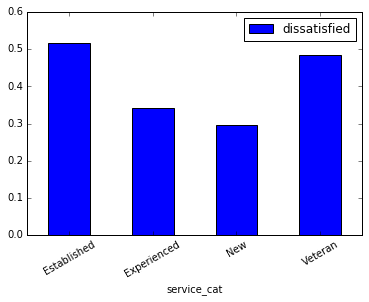

In [161]:
pivot.plot.bar(rot=30)

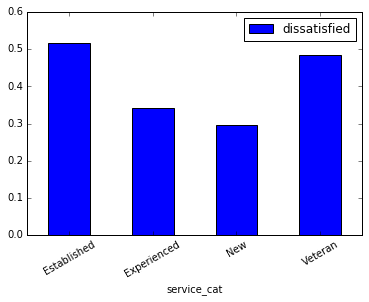

In [165]:
%matplotlib inline

pivot.plot(kind="bar", rot=30)

From the initial analysis above, we can tentatively conclude that employees with 7 or more years of service are more likely to resign due to some kind of dissatisfaction with the job than employees with less than 7 years of service. However, we need to handle the rest of the missing data to finalize our analysis.

In [166]:
combined_updated.age

0            36-40
1            41-45
2            31-35
3            46-50
4            31-35
5            36-40
6            31-35
7      61 or older
8            56-60
9            51-55
10           46-50
11     61 or older
12           41-45
13           21-25
14           36-40
15     61 or older
16           21-25
17           21-25
18           56-60
19           51-55
20           41-45
21           51-55
22           21-25
23           21-25
24     61 or older
25           26-30
26           46-50
27           31-35
28           36-40
29           36-40
          ...     
621         46  50
622         41  45
623         46  50
624            NaN
625            NaN
626         26  30
627            NaN
628         46  50
629          51-55
630         41  45
631         36  40
632          51-55
633    56 or older
634         26  30
635         26  30
636         41  45
637         41  45
638         26  30
639         41  45
640         46  50
641         41  45
642         

In [175]:
combined_updated['age_cleaned'] = combined_updated.age.str.split("-").str[0]

combined_updated.age_cleaned

0               36
1               41
2               31
3               46
4               31
5               36
6               31
7      61 or older
8               56
9               51
10              46
11     61 or older
12              41
13              21
14              36
15     61 or older
16              21
17              21
18              56
19              51
20              41
21              51
22              21
23              21
24     61 or older
25              26
26              46
27              31
28              36
29              36
          ...     
621         46  50
622         41  45
623         46  50
624            NaN
625            NaN
626         26  30
627            NaN
628         46  50
629             51
630         41  45
631         36  40
632             51
633    56 or older
634         26  30
635         26  30
636         41  45
637         41  45
638         26  30
639         41  45
640         46  50
641         41  45
642         

In [176]:
combined_updated['age_cleaned'] = combined_updated['age_cleaned'].str.split(" ").str[0]

combined_updated.age_cleaned

0       36
1       41
2       31
3       46
4       31
5       36
6       31
7       61
8       56
9       51
10      46
11      61
12      41
13      21
14      36
15      61
16      21
17      21
18      56
19      51
20      41
21      51
22      21
23      21
24      61
25      26
26      46
27      31
28      36
29      36
      ... 
621     46
622     41
623     46
624    NaN
625    NaN
626     26
627    NaN
628     46
629     51
630     41
631     36
632     51
633     56
634     26
635     26
636     41
637     41
638     26
639     41
640     46
641     41
642    NaN
643     56
644     26
645    NaN
646     21
647     51
648    NaN
649     51
650     26
Name: age_cleaned, Length: 651, dtype: object

In [178]:
combined_updated.age_cleaned.value_counts(dropna=False)

41     93
46     81
36     73
51     71
26     67
21     62
31     61
56     55
NaN    55
61     23
20     10
Name: age_cleaned, dtype: int64

In [181]:
combined_updated['age_cleaned'] = combined_updated['age_cleaned'].astype(int)
combined_updated['age_cleaned'] = combined_updated['age_cleaned'].fillna(combined_updated['age_cleaned'].mean())
combined_updated.age_cleaned.value_counts(dropna=False)

41    93
46    81
36    73
51    71
26    67
21    62
31    61
56    55
39    55
61    23
20    10
Name: age_cleaned, dtype: int64

In [182]:
pivot_age = combined_updated.pivot_table(values='dissatisfied', index='age_cleaned')

pivot_age

,dissatisfied
age_cleaned,
20,0.200000
21,0.306452
26,0.417910
31,0.377049
36,0.342466
39,0.254545
41,0.376344
46,0.382716
51,0.422535


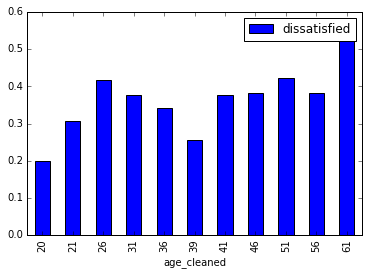

In [185]:
pivot_age.plot.bar()